# __LOGISTIC REGRESSION FROM ALMOST SCRATCH__

## Introduction

#### This is a project made by me <a href="https://github.com/Rulios">Robert Lu Zheng</a> to start in this advancing and fast paced environment of ML. 

## Description

#### I'll be implementing a Logistic Regression on a dataset using Pandas, NumPy. No framework, no library that has any kind of support that can scaffold this algorithm, everything from scratch (almost)

#### This Jupyter Notebook will contain all the breakdown process of what I did to build the logistic regression algorithm. 

### Install libraries (optional)

In [1]:
# Install pip packages in the current Jupyter kernel
import sys

print(sys.executable)


pythonExecutable = "\"" + sys.executable + "\""

print(pythonExecutable)

!{pythonExecutable} -m pip install numpy
!{pythonExecutable} -m pip install pandas
!{pythonExecutable} -m pip install matplotlib
!{pythonExecutable} -m pip install scikit-learn


e:\Documents\AI PROJECTS\ml-algorithms-from-scratch\logistic-regression-from-scratch\Scripts\python.exe
"e:\Documents\AI PROJECTS\ml-algorithms-from-scratch\logistic-regression-from-scratch\Scripts\python.exe"



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import the libraries

In [46]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random 
import sklearn.metrics as sm
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Import the dataset (as Pandas DataFrame)

In [3]:
data = pd.read_csv("./data/diabetes2.csv")

### Objective

To predict whether a person is having diabetics or not

### Dataset notes

I use this section to take notes on the dataset when I explore it, and get a better understanding of what I'm trying to accomplish 

This dataset is extracted from <a href="https://www.kaggle.com/datasets/kandij/diabetes-dataset?resource=download">here</a>


***

Definition of the selected features as per the official source + my interpretation: 

- Glucose: 
    - Unit: mg/dL
    - Min: 0
    - Max: 199
- BMI (body mass index): is a measure of body fat based on height and weight that applies to adult men and women. It is calculated by dividing a person's weight in kilograms by the square of their height in meters.
    - Unit: none
    - Min: 0
    - Max: 67.1

    

Dataset constraints: 

- All patients belongs to the Pima Indian Heritage 
- All patients are female of age 21 or above


***

***
Experimental notes (in ascending order): 
1) No empty row in the dataset
2) It seems that the features of Glucose, BMI, Age, and Pregnancies are the feature with the most correlation with the outcome of a patient having Diabetes. 
3) First and foremost, I'll select BMI and Glucose as my starting features to predict whether a patient is having Diabetes.
4) As I inspect the dataset, although the count of numbers of all features are matching, there're some features that have impossible outliers. For example, the minimum value in Glucose is 0. Which is impossible, unless that patient is dead, meaning no Glucose at its blood. Same goes for BMI, having a minimum of 0 allegates that the weight of that patient is 0, which again, impossible at any physical law. 
5) I'll edit those rows described in the previous notes. These values will be replaced by the mean of that column. 
6) 
s
***


***
Results and observations: 

Note: I splitted the data in 65% to training set and 35% to test set. 



***

Run the cells below to get a better understanding of the dataset 

In [4]:
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
#Print correlations 

print(data.corr())


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221


### Algorithm (logistic regression) 
Features: Glucose, BMI

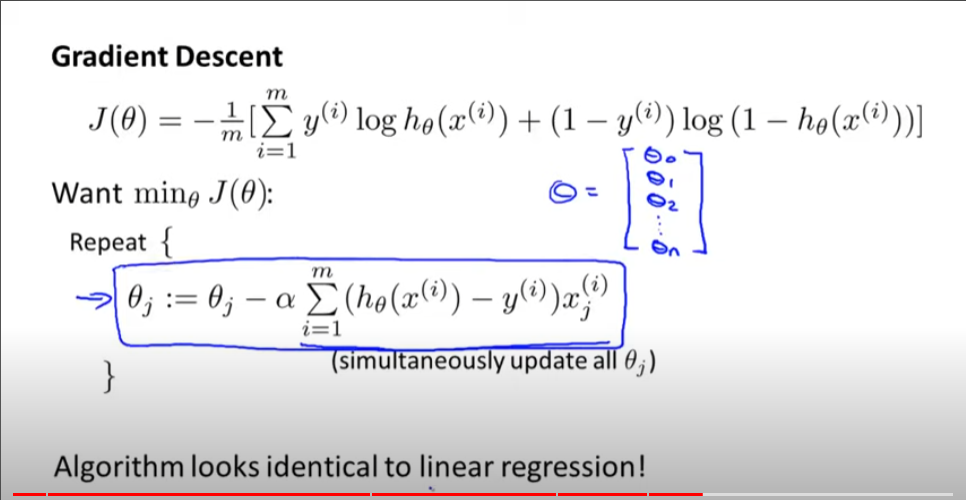

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.

<Axes: xlabel='BMI', ylabel='Outcome'>

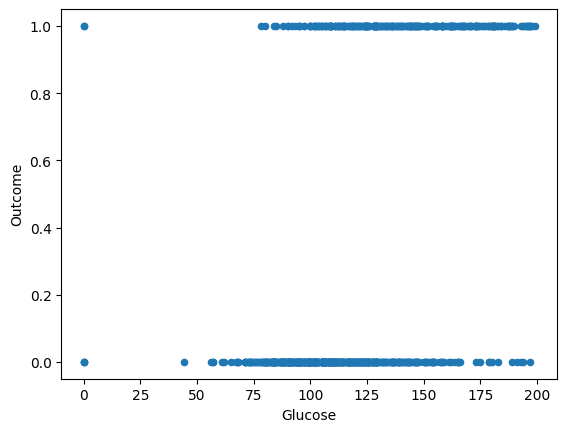

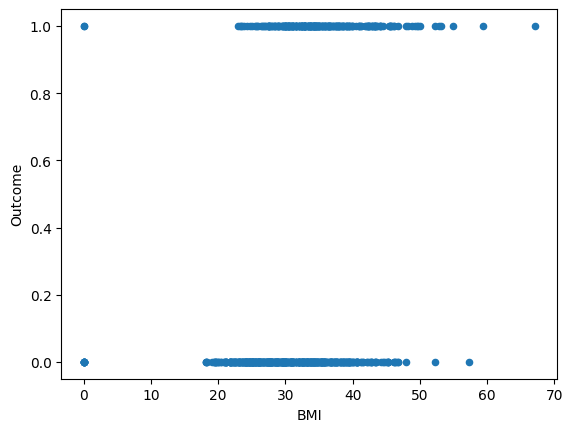

In [6]:
#description of the features 
# - Glucose
# - BMI 
data = pd.read_csv("./data/diabetes2.csv")

print(data["Glucose"].describe())
print(data["BMI"].describe())

#print(data["Glucose"].where(data["Glucose"] == 0))
print(data.to_string())

data.plot.scatter(x="Glucose", y="Outcome")
data.plot.scatter(x="BMI", y="Outcome")






In [43]:
def initParams(numberOfFeatures): 
    
    learningRate = 0.001
    iterations = 1000

    
    #these 2 parameter may change (initialize randomly)
    thetas = np.random.rand(numberOfFeatures, 1)
    b0 = random.random()
    
    return learningRate, thetas, b0, iterations

def hypothesis(b0, thetas, x):
    return b0 + np.matmul(x, thetas)

def sigmoidActivation(z):
    return 1/(1 + np.exp(-z))

#log loss
def costFunction(computed, expected):
    return np.average(
        -expected * np.log(computed) - ((1 - expected) * np.log(1 - computed))
    )


def normalize(data): 
    norm = np.linalg.norm(data)
    return data / norm

def gradientDescent(training_set, expectedValues):
   

    learningRate, thetas, b0, iterations = initParams(np.shape(training_set)[1])

    #adjust expectedValues dimeensions to be the same as computed values
    expectedValues = np.reshape(expectedValues, (np.shape(expectedValues)[0], 1))
    
    print("a", b0,  thetas)

    #print(hypothesis(b0, thetas, training_set))

    for i in range(iterations):

    

        #compute hypothesis
        computed = sigmoidActivation(hypothesis(b0, thetas, training_set))
        
        newB0 = b0 - learningRate * np.sum(computed - expectedValues)
        newThetas = np.copy(thetas)
        for j in range(len(thetas)):
            newThetas[j] = thetas[j] - learningRate * np.sum(computed - expectedValues) * np.sum(training_set[:, j])
            

        #print(newThetas)
        #update parameters
        b0 = newB0
        thetas = newThetas
        #print(computed)
        #measure goodness of fit (log loss)
        print("cost: ", costFunction(computed, expectedValues))
        #print(expectedValues)

    return b0, thetas


data = pd.read_csv("./data/diabetes2.csv")

#clean the data (SEE Experimental Notes 4, 5)

averageGlucose = data[data["Glucose"] > 0]["Glucose"].mean()
averageBMI = data[data["BMI"] > 0]["BMI"].mean()
glucoseIndex = data.columns.get_loc("Glucose")
BMIIndex = data.columns.get_loc("BMI")
outcomeIndex = data.columns.get_loc("Outcome")
featuresIndexes = [glucoseIndex, BMIIndex]

for i in data.index: 
    if(data.loc[i, "Glucose"] == 0):
        data.loc[i, "Glucose"] = averageGlucose
    if(data.loc[i, "BMI"] == 0):
        data.loc[i, "BMI"] = averageBMI

#convert into np
data = np.array(data)


#shuffle
np.random.shuffle(data)

#get size of data
m, n = np.shape(data)

#NORMALIZE DATASET
data[:, featuresIndexes] = normalize(data[:, featuresIndexes])


#split the data set 70$ - training, 30% - testing
training_set = data[0:int(m*.7)]
test_set = data[int(m*.3):m]

#print(data[:, featuresIndexes])


b0, thetas = gradientDescent(training_set=training_set[:, featuresIndexes], 
                expectedValues=training_set[:, outcomeIndex])








a 0.9493870145928148 [[0.72639789]
 [0.56164033]]
cost:  0.948046697468301
cost:  0.8447075980446787
cost:  0.779094262795082
cost:  0.7395264923090312
cost:  0.7164390618944453
cost:  0.7032651523784132
cost:  0.6958990506466955
cost:  0.691888479879802
cost:  0.6897977217689002
cost:  0.6887926762285961
cost:  0.6883903518742034
cost:  0.6883120567275308
cost:  0.6883981054859725
cost:  0.6885582315077784
cost:  0.6887426346496172
cost:  0.6889249987787961
cost:  0.689092497883636
cost:  0.6892399109161085
cost:  0.6893661664266059
cost:  0.6894723297185645
cost:  0.68956044749044
cost:  0.6896329011776573
cost:  0.6896920602210076
cost:  0.6897401101048656
cost:  0.6897789802385661
cost:  0.6898103270444693
cost:  0.6898355459114439
cost:  0.6898557967123736
cost:  0.6898720342199328
cost:  0.6898850387127304
cost:  0.6898954443947664
cost:  0.6899037645965072
cost:  0.6899104134781755
cost:  0.6899157243548434
cost:  0.6899199649548373
cost:  0.6899233499965133
cost:  0.68992605147


### Algorithm (logistic regression w/ Sklearn) 
Features: Glucose, BMI


In [62]:
def initParams(numberOfFeatures): 
    
    learningRate = 0.001
    iterations = 1000

    
    #these 2 parameter may change (initialize randomly)
    thetas = np.random.rand(numberOfFeatures, 1)
    b0 = random.random()
    
    return learningRate, thetas, b0, iterations


data = pd.read_csv("./data/diabetes2.csv")

#clean the data (SEE Experimental Notes 4, 5)

averageGlucose = data[data["Glucose"] > 0]["Glucose"].mean()
averageBMI = data[data["BMI"] > 0]["BMI"].mean()
glucoseIndex = data.columns.get_loc("Glucose")
BMIIndex = data.columns.get_loc("BMI")
outcomeIndex = data.columns.get_loc("Outcome")
featuresIndexes = [glucoseIndex, BMIIndex]

for i in data.index: 
    if(data.loc[i, "Glucose"] == 0):
        data.loc[i, "Glucose"] = averageGlucose
    if(data.loc[i, "BMI"] == 0):
        data.loc[i, "BMI"] = averageBMI

#convert into np
""" data = np.array(data) """


#shuffle
""" np.random.shuffle(data) """

#get size of data
""" m, n = np.shape(data) """

#NORMALIZE DATASET
""" data[:, featuresIndexes] = normalize(data[:, featuresIndexes]) """


#split the data set 70$ - training, 30% - testing
""" training_set = data[0:int(m*.7)]
test_set = data[int(m*.3):m] """

X_train, X_test, y_train, y_test = train_test_split(data["Glucose"], data["Outcome"], test_size=0.20)

#print(data[:, featuresIndexes])
print(X_train.head())
print("")
print(data["Glucose"].head())
#print(y_train)

""" # Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()  

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")

 """





616    117.0
572    111.0
593     82.0
404    168.0
354     90.0
Name: Glucose, dtype: float64

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: Glucose, dtype: float64


' # Create an instance and fit the model \nlr_model = LogisticRegression()\nlr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))\n\n# Making predictions\ny_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))\n\nplt.clf()\nplt.scatter(X_test, y_test)\nplt.scatter(X_test, y_pred_sk, c="red")\nplt.show()  \n\n# Accuracy\nprint(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")\n\n '